In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
from BNN_Learning_Rate_Tuning import bnn_learning_rate_tuning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1
end_lr = 1e-4

window_size = 1
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [3]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=1, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [4]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.005 - Succesfull Train Percentage : 100.0% - Time Passed : 0.1 Second
MSE : 2.556536202905929 - Standard Deviation : 1.0852826273419618
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : 0.23604249062780008 - Standard Deviation : 1.1746083495347313
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 3 / 50 - Learning Rate : 0.0016666666666666668 - Succesfull Train Percentage : 100.0% - Time Passed : 0.1 Second
MSE : 0.013871644312188992 - Standard Deviation : 1.1889281442847255
-----------

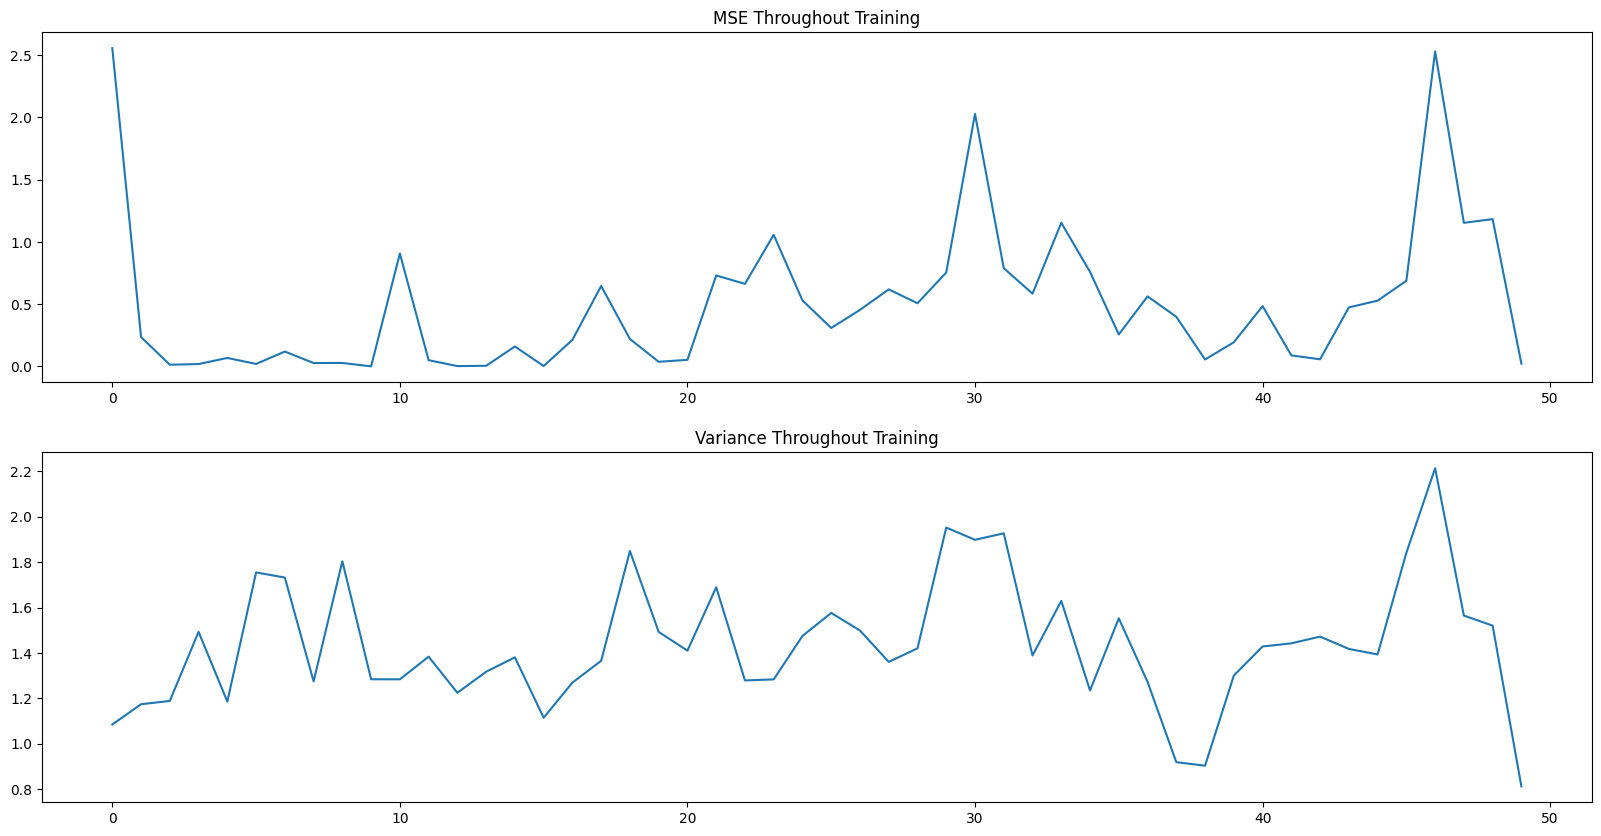

In [5]:
bnn.visualize_performance()

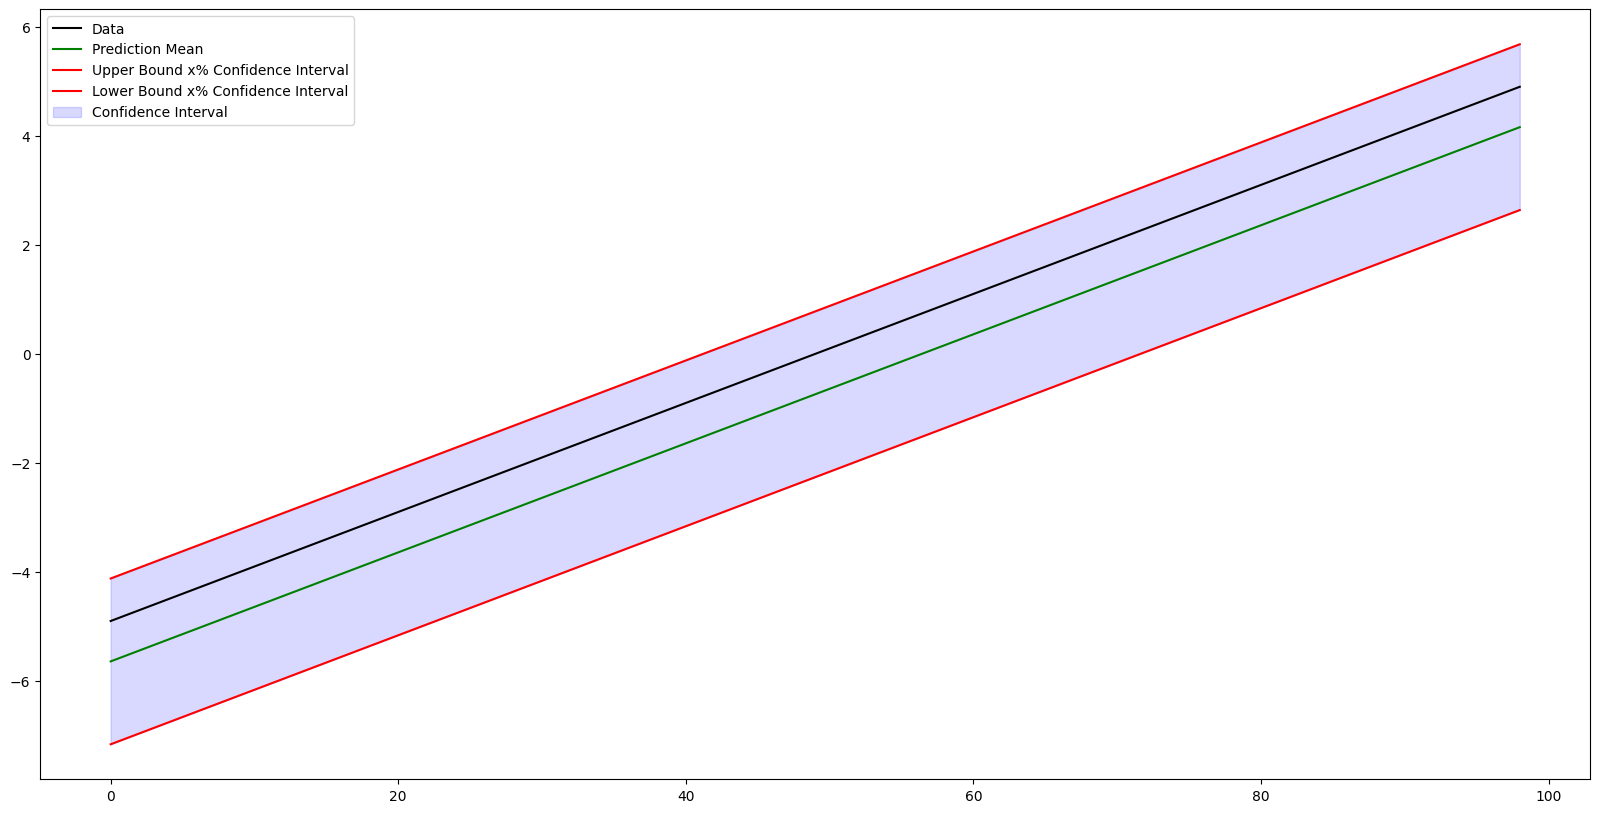

In [6]:
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [7]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data[:-1]
target_data = y_data[1:]

total_epochs = 50
initial_lr = 1e-1
end_lr = 1e-4

window_size = 1
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [8]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [9]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.005 - Succesfull Train Percentage : 100.0% - Time Passed : 0.12 Second
MSE : 1.3586584970513436 - Standard Deviation : 0.8785064005605381
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.0025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : 1.2816443389878218 - Standard Deviation : 1.025919917947248
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 3 / 50 - Learning Rate : 0.0016666666666666668 - Succesfull Train Percentage : 100.0% - Time Passed : 0.09 Second
MSE : 1.767833565311918 - Standard Deviation : 1.158641905167172
--------------

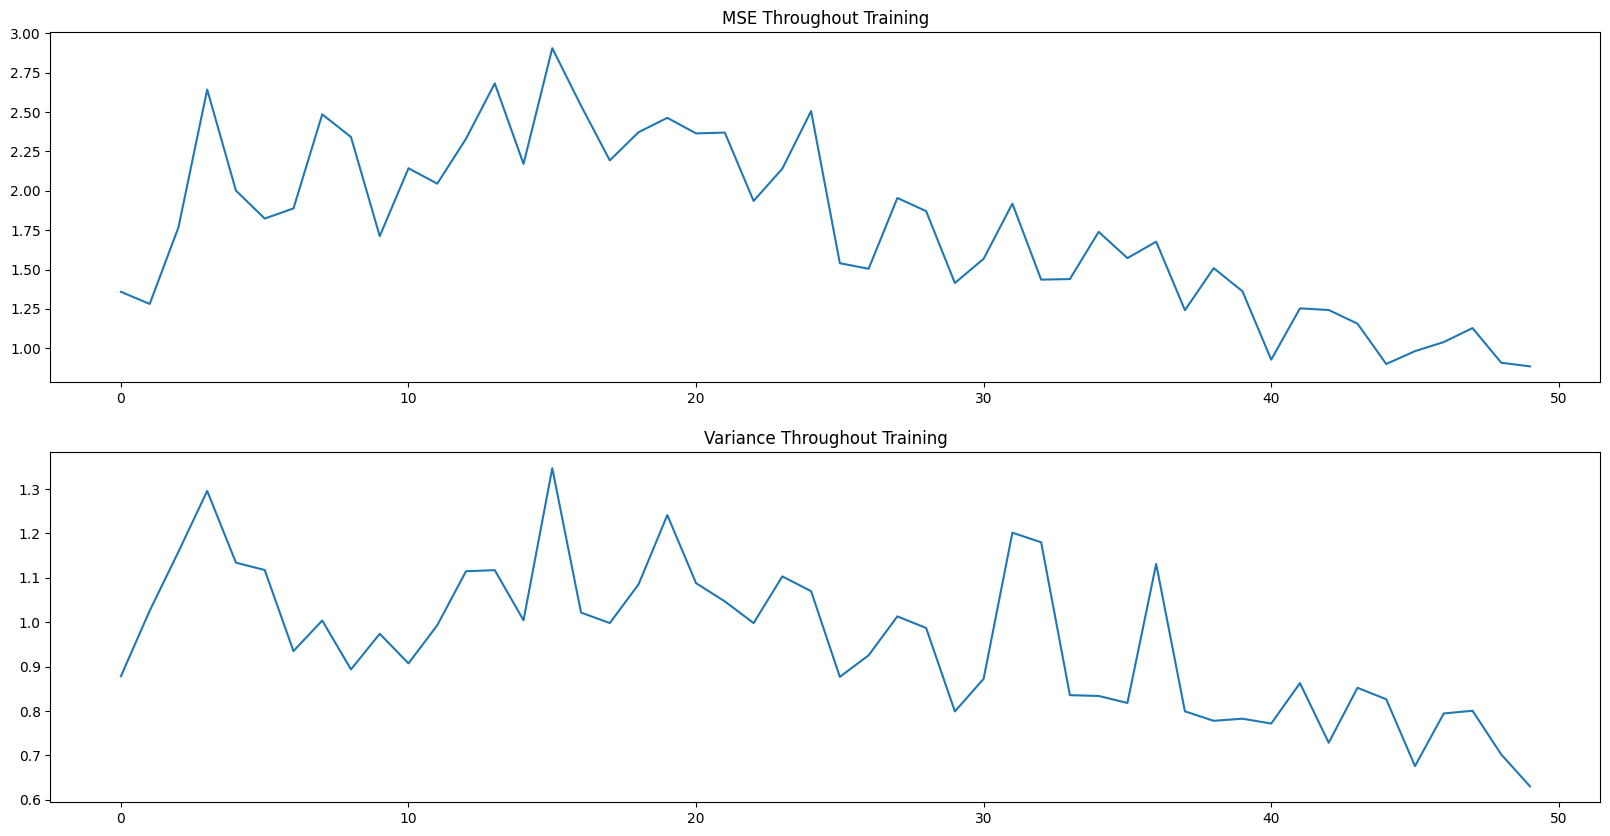

In [10]:
bnn.visualize_performance()

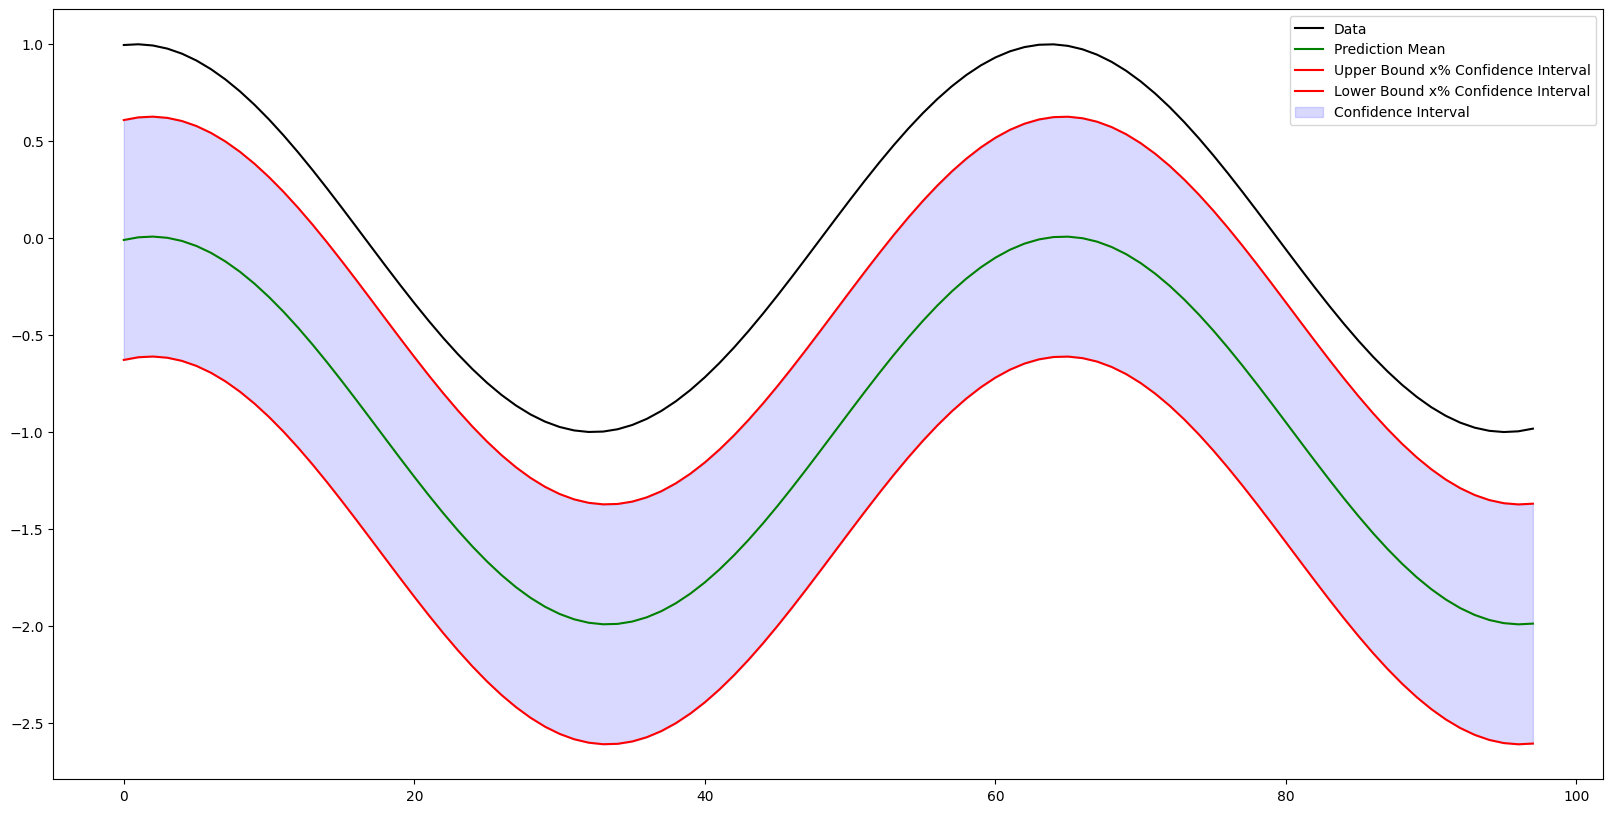

In [11]:
bnn.visualize_predictions_on_seen_data()

# Model Performance On Multiple Inputs

## On Linear Data

In [12]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1
end_lr = 1e-3

window_size = 2
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [13]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [14]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 0.05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.15 Second
MSE : 0.466198595680171 - Standard Deviation : 0.23268035067661766
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 0.025 - Succesfull Train Percentage : 100.0% - Time Passed : 0.14 Second
MSE : 0.2777454297526107 - Standard Deviation : 0.10934788454485271
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 3 / 50 - Learning Rate : 0.016666666666666666 - Succesfull Train Percentage : 100.0% - Time Passed : 0.17 Second
MSE : 0.23043310882541806 - Standard Deviation : 0.08992833983583738
-----------

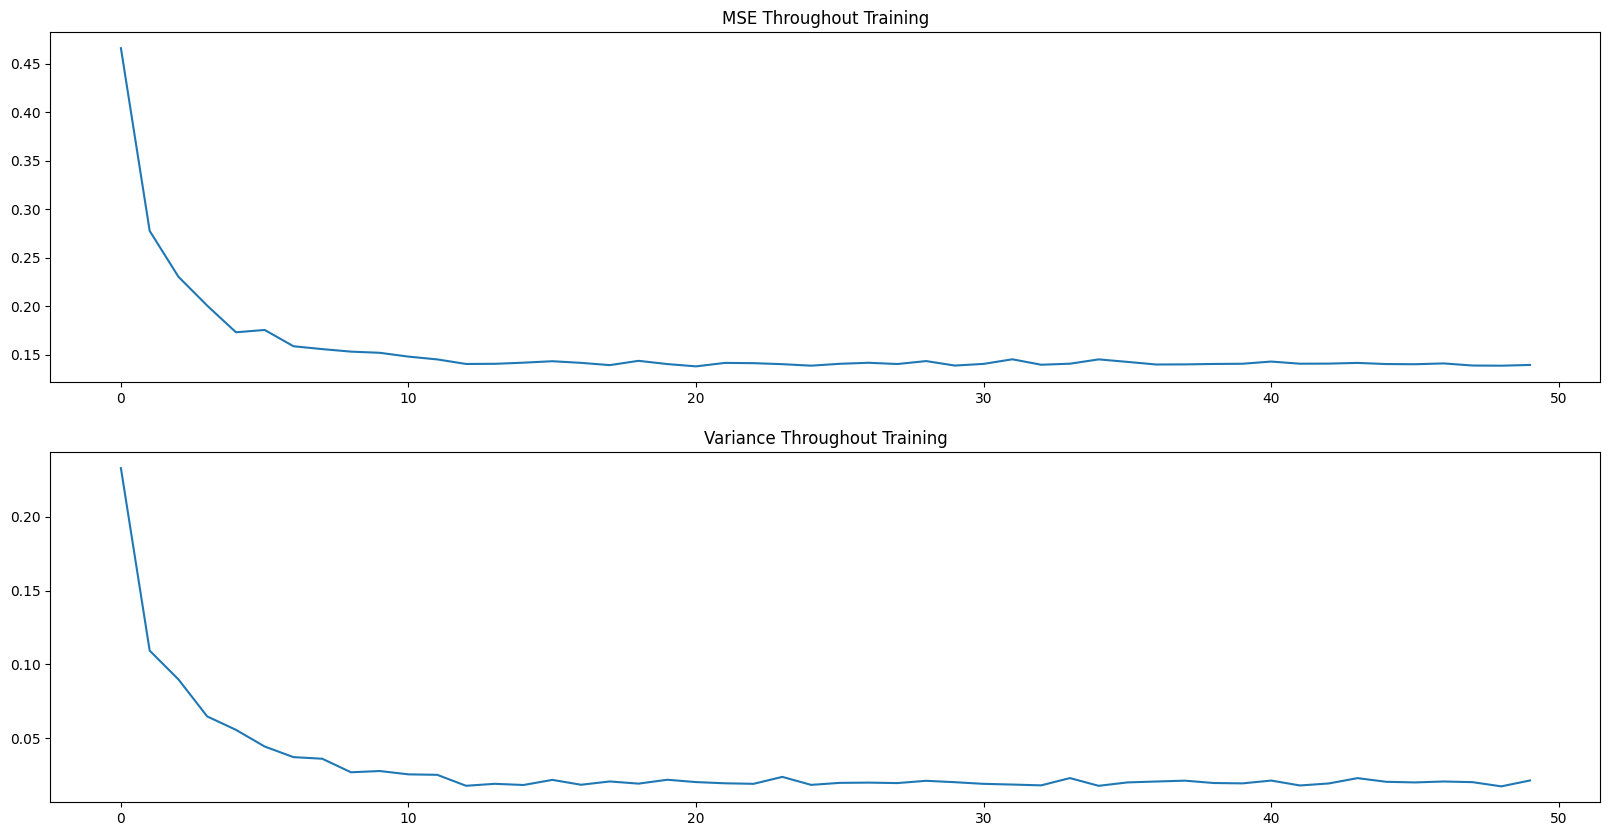

In [15]:
bnn.visualize_performance()

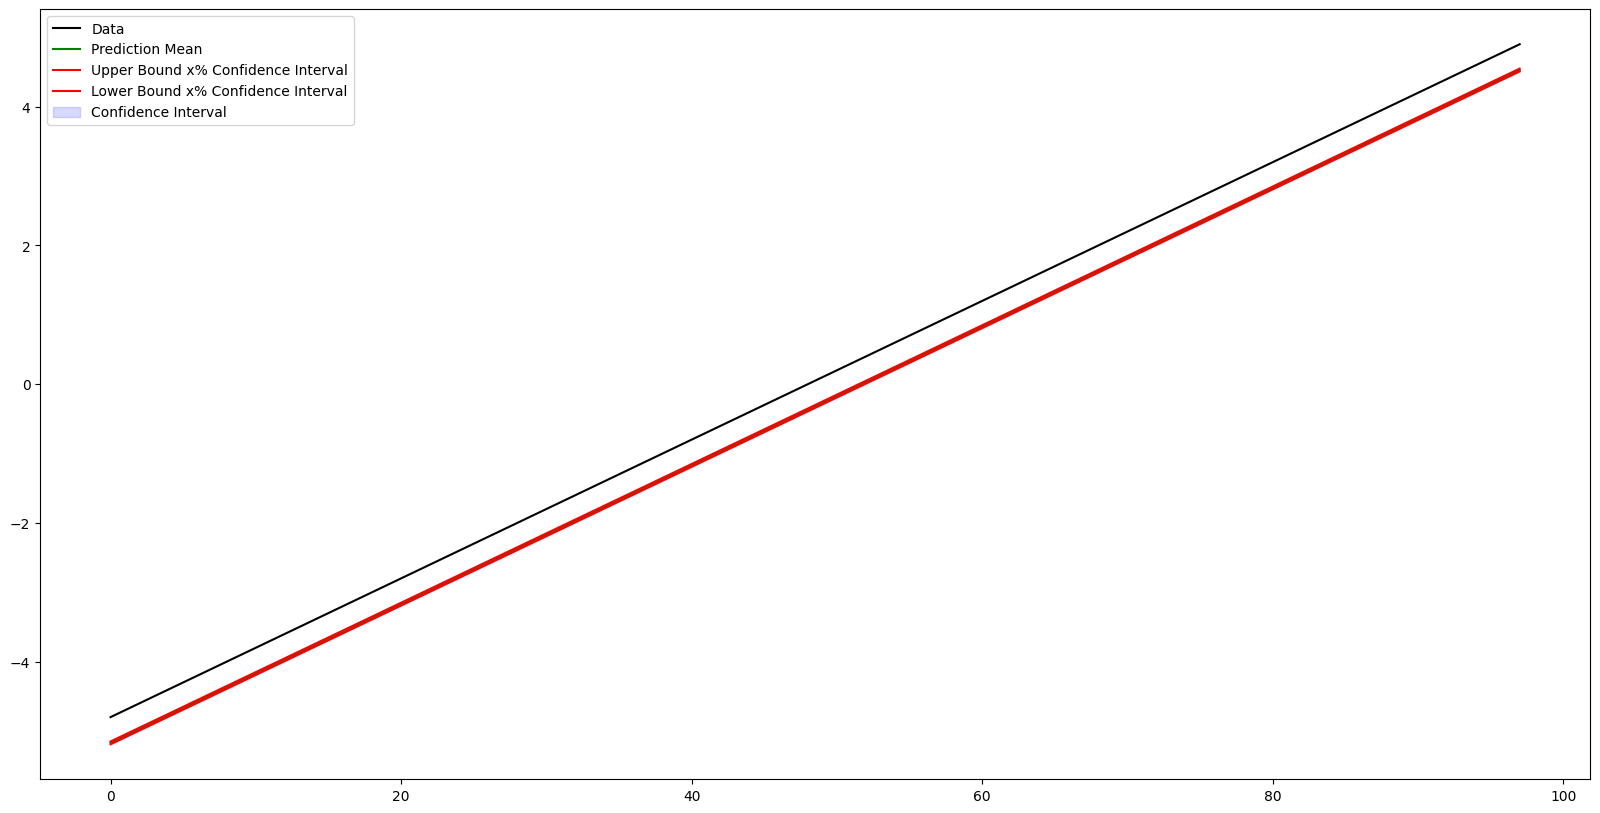

In [16]:
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [42]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data

total_epochs = 50
initial_lr = 1e-2
end_lr = 1e-6

window_size = 2
error_type = 'mse'
learning_rate_decay_type = 'exponential'

In [43]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, error_type, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_windowed_dataset()
bnn.generate_m()
bnn.generate_v()

In [44]:
bnn.train_model(total_epochs, learning_rate_decay_type)

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 50 - Learning Rate : 5e-05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.14 Second
MSE : 3.7505445329792604 - Standard Deviation : 1.1295817224804563
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 50 - Learning Rate : 2.5e-05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.12 Second
MSE : 4.29970390223139 - Standard Deviation : 1.0696181584796522
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 3 / 50 - Learning Rate : 1.6666666666666667e-05 - Succesfull Train Percentage : 100.0% - Time Passed : 0.13 Second
MSE : 3.577711491305221 - Standard Deviation : 0.8847827582134946
------------

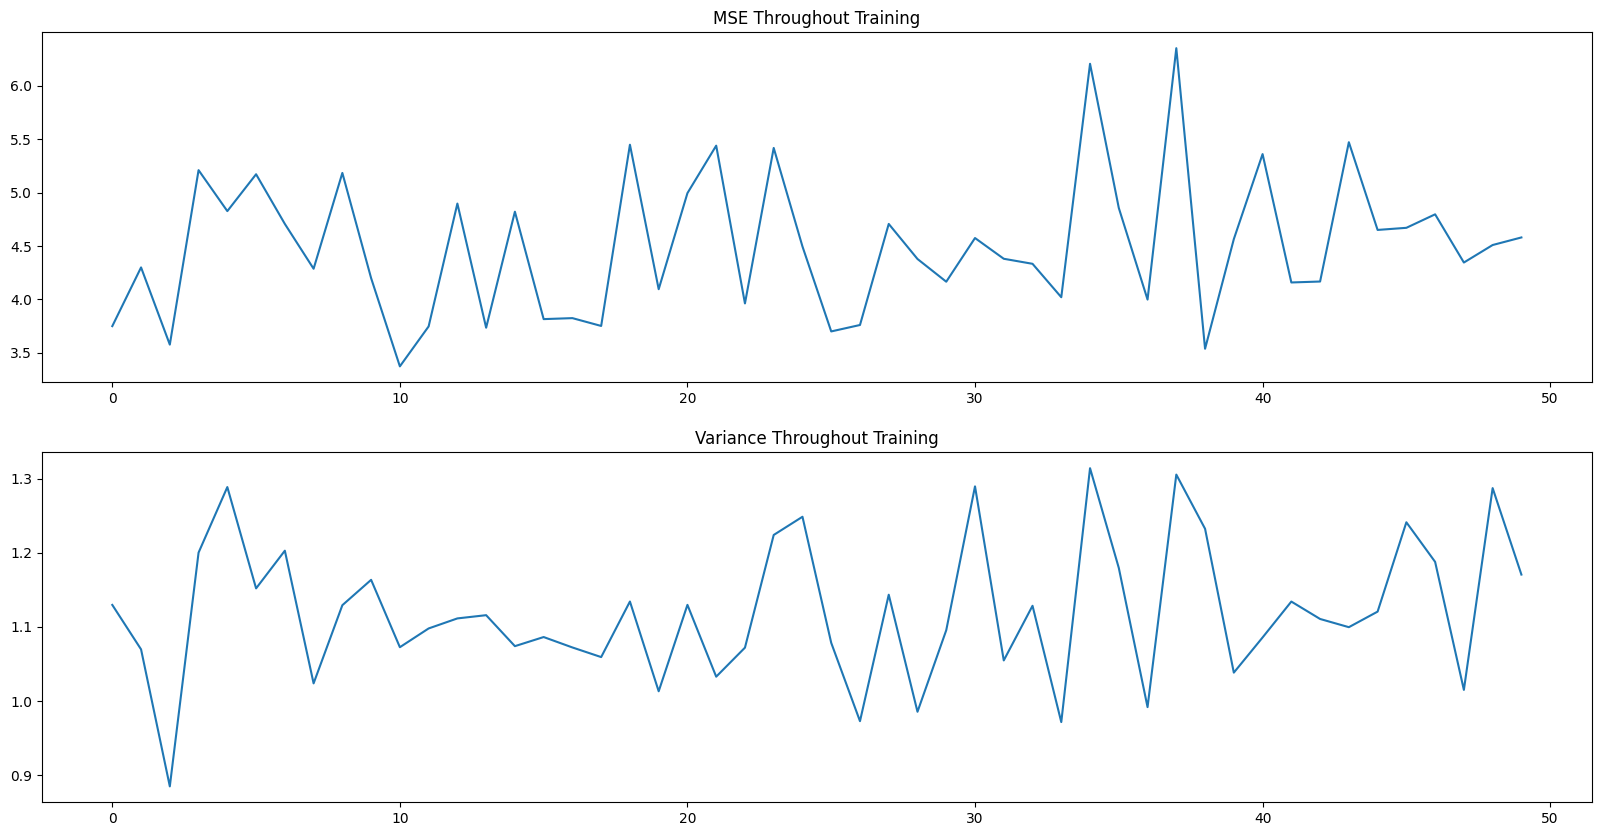

In [45]:
bnn.visualize_performance()

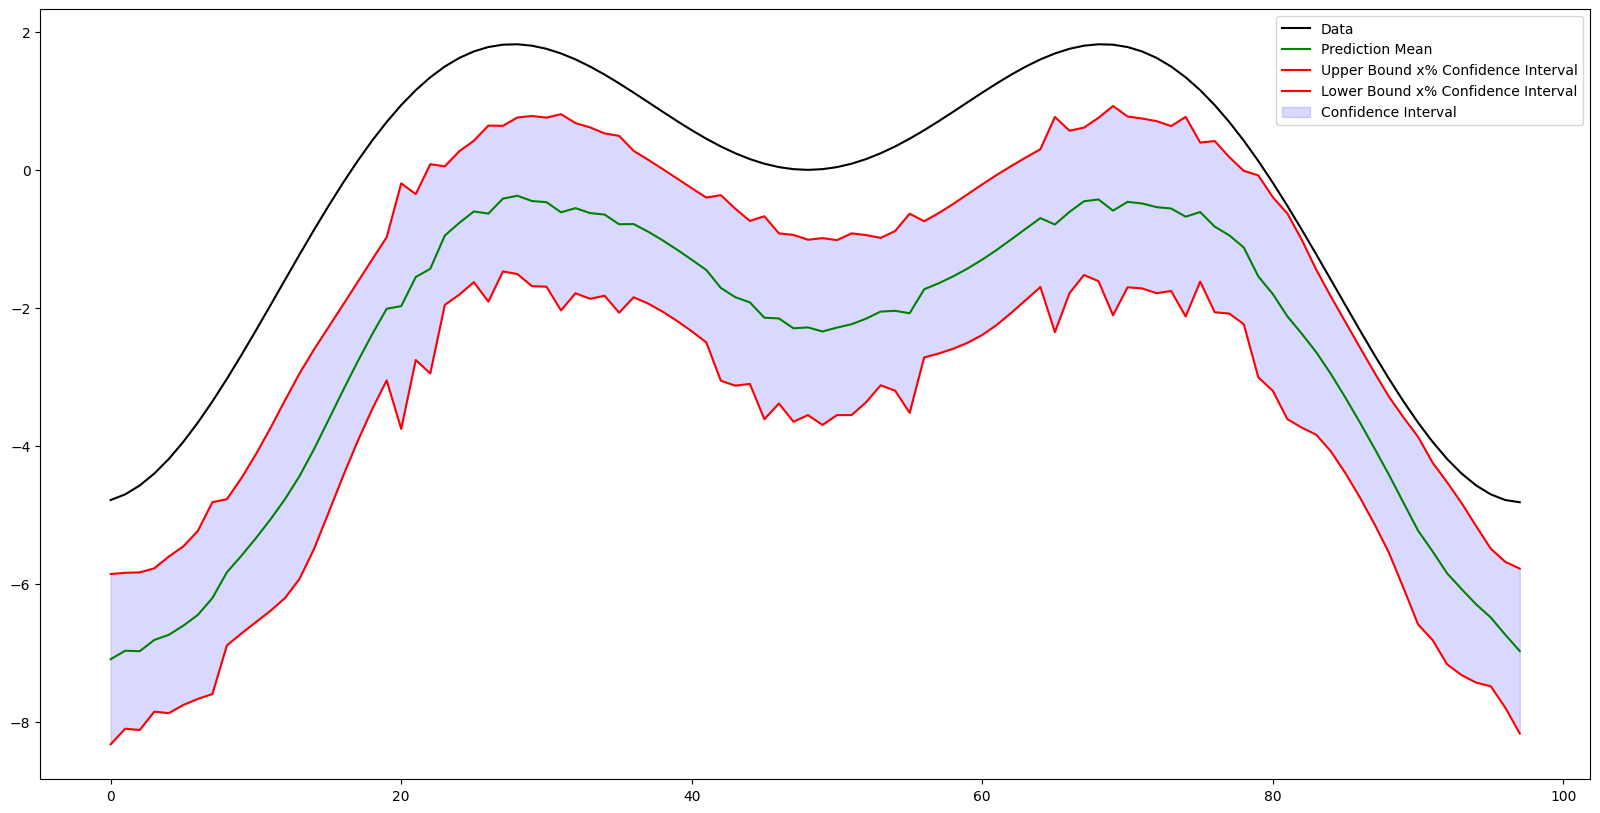

In [46]:
bnn.visualize_predictions_on_seen_data()

# Model Learning Rate Tuning

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

initial_lr = 10
end_lr = 20
total_iters = 50
tuning_epochs = 25
window_size = 3

In [ ]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr, end_lr_power=end_lr, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [ ]:
bnn_lr_tuning.learning_rate_tuning()

In [ ]:
bnn_lr_tuning.visualize_learning_rate_tuning()

# Model Performance On Data With Outliers

## Data Preparation

In [ ]:
x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data) * x_data

y_data[-5] *= 0.75
y_data[15] *= 2
y_data[40] *= 0.1
y_data[70] *= 0.5
y_data[-20] *= 2.5

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 5)
plt.plot(x_data, y_data)

## Learning Rate Tuning

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

initial_lr_power = 1
end_lr_power = 20
total_iters = 100
tuning_epochs = 25
window_size = 3

In [ ]:
bnn_lr_tuning = bnn_learning_rate_tuning(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr_power=initial_lr_power, end_lr_power=end_lr_power, total_iters=total_iters, tuning_epochs=tuning_epochs)

In [ ]:
bnn_lr_tuning.learning_rate_tuning()

In [ ]:
bnn_lr_tuning.visualize_learning_rate_tuning()

## Model Fitting and Performances

In [ ]:
input_layer = [3]
hidden_layers = [8, 4, 2]
output_layer = [1]

window_size = 3
initial_lr = 1e-5
end_lr = 1e-10

total_epochs = 100
learning_rate_decay_type = 'exponential'

In [ ]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, window_size=window_size, initial_lr=initial_lr, end_lr=end_lr)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [ ]:
bnn.train_model(total_epochs, learning_rate_decay_type)

In [ ]:
bnn.visualize_performance()

In [ ]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()